In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [18]:
df = pd.read_csv('../data/distribution/merged_filtered.csv')
df = df[df['CONT'] > 0]

In [19]:
df['CONT'].describe()

count    4.332140e+05
mean     2.011052e+06
std      2.875974e+07
min      1.000000e+00
25%      3.076000e+04
50%      1.319360e+05
75%      6.441048e+05
max      9.265120e+09
Name: CONT, dtype: float64

In [20]:
# remove outliers
q1 = df['CONT'].quantile(0.25)
q3 = df['CONT'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
df = df[(df['CONT'] < high)]

df['CONT'].describe()

count    3.696570e+05
mean     2.389028e+05
std      3.360635e+05
min      1.000000e+00
25%      2.375000e+04
50%      8.795900e+04
75%      3.052680e+05
max      1.564085e+06
Name: CONT, dtype: float64

In [21]:
total_conts = df[['FISYR', 'CONT']].groupby('FISYR').sum().reset_index()
number_conts = df[['FISYR', 'CONT']].groupby('FISYR').count().reset_index()

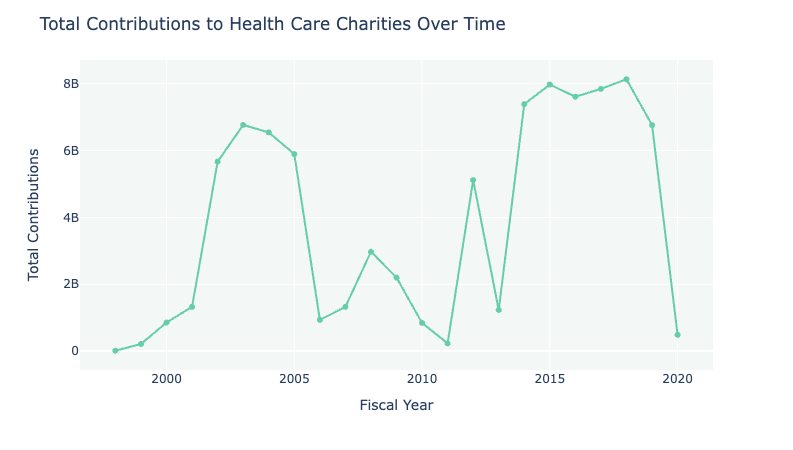

In [22]:
fig = px.line(total_conts, x='FISYR', y='CONT', markers=True)
fig.update_layout(
    title='Total Contributions to Health Care Charities Over Time',
    xaxis_title='Fiscal Year',
    yaxis_title='Total Contributions',
    plot_bgcolor='rgba(193, 216, 207, 0.2)'
)
fig.update_traces(line_color='mediumaquamarine')
fig.show()  

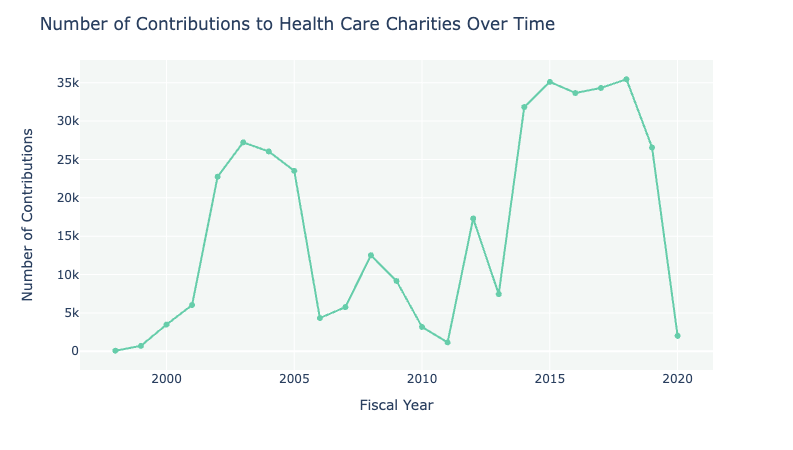

In [23]:
fig = px.line(number_conts, x="FISYR", y="CONT", markers=True)
fig.update_layout(
    title='Number of Contributions to Health Care Charities Over Time',
    xaxis_title='Fiscal Year',
    yaxis_title='Number of Contributions',
    plot_bgcolor='rgba(193, 216, 207, 0.2)'
)
fig.update_traces(line_color='mediumaquamarine')
fig.show()